In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/content/transfusion.csv')
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [4]:
dff = df.drop_duplicates()
dff

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [5]:
df.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [6]:
dff.rename(columns= {
    "Recency (months)" : "Recency",
    "Frequency (times)" : "Frecuency",
    "Monetary (c.c. blood)" : "Monetary",
    "Time (months)": "Time"
}, inplace= True)

dff

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Recency,Frecuency,Monetary,Time,whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [7]:
dff['whether he/she donated blood in March 2007'].value_counts()

0    384
1    149
Name: whether he/she donated blood in March 2007, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


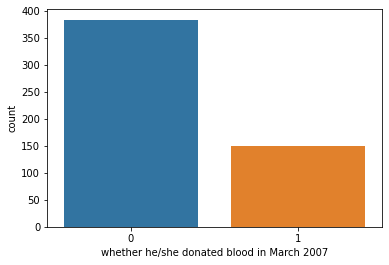

In [8]:
sns.countplot(dff['whether he/she donated blood in March 2007'], label="Count")

In [9]:
x= dff.drop(['whether he/she donated blood in March 2007'], axis=1)
y = dff['whether he/she donated blood in March 2007']

In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.25)

In [11]:
from sklearn.preprocessing import StandardScaler
model = StandardScaler()
x_train = model.fit_transform(x_train)
x_test = model.fit_transform(x_test)

In [12]:
def models(x_train,y_train):
  # Logistic Regression
  from sklearn.linear_model import LogisticRegression
  lr = LogisticRegression()
  lr.fit(x_train,y_train)

  # Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier()
  tree.fit(x_train, y_train)

  # Random Forest
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier()
  forest.fit(x_train,y_train)

  # KNN
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier()
  knn.fit(x_train,y_train)

  # XGB
  from xgboost import XGBClassifier
  xgb = XGBClassifier()
  xgb.fit(x_train,y_train)

  print('LR:', lr.score(x_train,y_train))
  print('DT:', tree.score(x_train,y_train))
  print('RF:', forest.score(x_train,y_train))
  print('KNN:', knn.score(x_train,y_train))
  print('XGB:', xgb.score(x_train,y_train))

  return lr, tree, forest, knn, xgb


In [37]:
model = models(x_train, y_train)

LR: 0.7493734335839599
DT: 0.9573934837092731
RF: 0.9573934837092731
KNN: 0.8145363408521303
XGB: 0.8270676691729323


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
best_model =KNeighborsClassifier()
cv_err = cross_val_score(best_model, x_train, y_train, cv=10)
print(cv_err.mean())

0.7268589743589744


In [35]:
y_pred = model[1].predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [36]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))

0.7164179104477612
              precision    recall  f1-score   support

           0       0.72      1.00      0.83        96
           1       0.00      0.00      0.00        38

    accuracy                           0.72       134
   macro avg       0.36      0.50      0.42       134
weighted avg       0.51      0.72      0.60       134

[[96  0]
 [38  0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
